[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


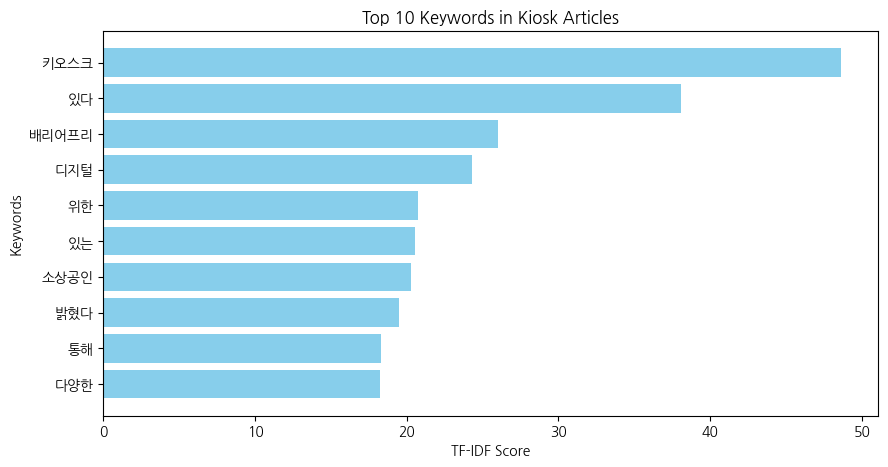

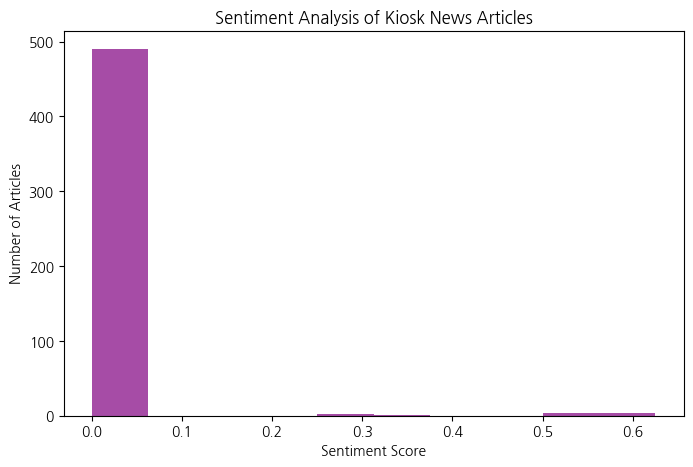

                                                 title  sentiment_score
193  [CEO 길을 내다] 김현진 하티웍스 대표, 아픔을 살려 희망을 “장애인 문제 내 ...           0.6249
51   LG전자, 글로벌 가전기업 최초 세계최대 ‘접근성 콘퍼런스’ 참가…높낮이 조절 키오...           0.6124
113                                농협카드, 다양한 골프 이벤트 진행           0.5859
245                          신한은행, ‘배리어프리 키오스크’ 도입 늘린다           0.5106
459                       [게시판] 신한은행, 장애인·고령자용 키오스크 지원           0.5106
..                                                 ...              ...
163                             점포에 ‘배리어프리 키오스크’ 설치 지원           0.0000
162                             용산구, 자치회관 일일특강 키오스크 교육           0.0000
161      “너 중국인이지”···탄핵 정국 속 캠퍼스로 번진 ‘혐중 정서’, 유학생들이 떤다           0.0000
160                          용산구, 자치회관서 키오스크 사용법 교육 운영           0.0000
498                     소상공인 "키오스크 효과 체감, 설치·운영비는 부담돼"           0.0000

[499 rows x 2 columns]


In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# 필요한 라이브러리 다운로드
nltk.download('vader_lexicon')

# 데이터 로드 (CSV 파일 경로 설정)
file_path = "./data/analyzing_kiosk.csv"  # 파일명을 업로드한 파일명으로 변경
df = pd.read_csv(file_path, encoding="utf-8")

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    text = re.sub(r'\n+', ' ', str(text))  # 줄 바꿈 제거
    text = re.sub(r'\s+', ' ', text)  # 공백 정리
    text = re.sub(r'\[[^\]]*\]', '', text)  # 대괄호 안 내용 제거
    return text.strip()

# 기사 내용 전처리
df['clean_content'] = df['content'].astype(str).apply(preprocess_text)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')  # 상위 20개 키워드 추출
tfidf_matrix = vectorizer.fit_transform(df['clean_content'])
feature_names = vectorizer.get_feature_names_out()

# 주요 키워드 시각화
word_scores = tfidf_matrix.sum(axis=0).A1  # TF-IDF 점수
word_freq = dict(zip(feature_names, word_scores))
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# 키워드 시각화
plt.figure(figsize=(10, 5))
plt.barh([w[0] for w in word_freq_sorted[:10]], [w[1] for w in word_freq_sorted[:10]], color='skyblue')
plt.xlabel("TF-IDF Score")
plt.ylabel("Keywords")
plt.title("Top 10 Keywords in Kiosk Articles")
plt.gca().invert_yaxis()
plt.show()

# 감성 분석 (긍정/부정 분석)
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 감성 분석 결과 시각화
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment_score'], bins=10, color='purple', alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.title("Sentiment Analysis of Kiosk News Articles")
plt.show()

# 감성 점수별 기사 제목 정렬 (긍정도 높은 순)
sentiment_summary = df[['title', 'sentiment_score']].sort_values(by='sentiment_score', ascending=False)
print(sentiment_summary)
